In [1]:
import numpy as np

from ge.classify import read_node_label, Classifier
from ge import DeepWalk
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')

    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()



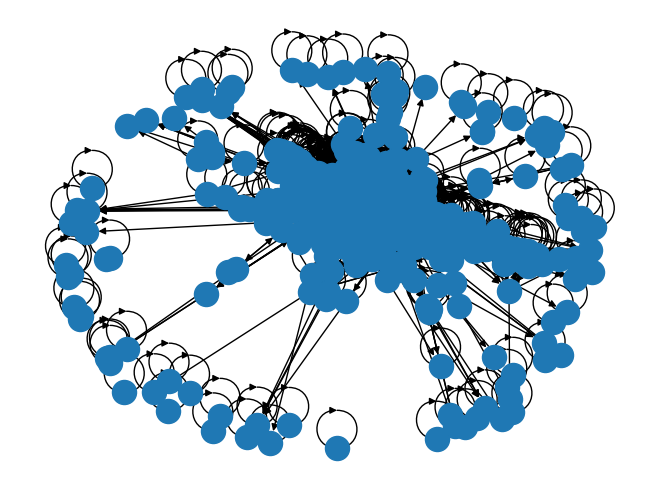

In [3]:
G = nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                        create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])
nx.draw(G, with_labels=False)

In [4]:
model = DeepWalk(G, walk_length=10, num_walks=80, workers=1)
model.train(window_size=5, iter=3)
embeddings = model.get_embeddings()
embeddings

Learning embedding vectors...
Learning embedding vectors done!


{'1397': array([ 0.3420257 , -0.470682  , -0.7371098 , -0.19423726,  0.17125599,
         0.03803873, -0.5406157 , -0.9787643 ,  0.51346433,  0.2598429 ,
         0.02658648, -0.33405715,  0.16957533, -0.21139705,  0.4664476 ,
         0.6014279 , -0.12616894,  0.0565624 ,  0.08272649, -0.04080186,
        -0.01870991,  0.25237012, -0.10439353, -0.35024032, -0.10760133,
         0.06964003,  0.01820011,  0.06770232, -0.09912182, -0.08198603,
        -0.12885773,  0.13737485, -0.5874127 ,  0.39396182, -0.44365913,
        -0.38637373,  0.15154712,  0.28173497,  0.5185638 ,  0.15648647,
        -0.60230225, -0.16574737, -0.05962779, -0.24928424, -0.42420414,
         0.02454072,  0.15254982,  0.08627372, -0.11237742,  0.00887572,
         0.52443767, -0.5412123 , -0.20901807,  0.35795072, -0.457357  ,
         0.24621022,  0.37302563, -0.06111275,  0.32743573, -0.04805269,
         0.08237457, -0.08439464, -0.01516766, -0.05748471,  0.60097355,
        -0.52029204,  0.11242092, -0.255759

In [5]:
evaluate_embeddings(embeddings)

Training classifier using 80.00% nodes...
-------------------
{'micro': 0.681912681912682, 'macro': 0.615560178968016, 'samples': 0.681912681912682, 'weighted': 0.6850354271350529, 'acc': 0.681912681912682}


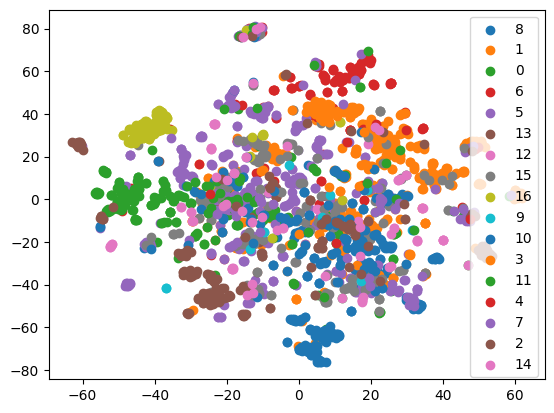

In [6]:
plot_embeddings(embeddings)